# Enhanced protein isoform characterization through long-read proteogenomics 
## Supplementary Note S1.4
---
Ben Jordan | Gloria Sheynkman

In [4]:
import pandas as pd
import numpy as np
import config, appris_helper


In [5]:
cpm_threshold = 1

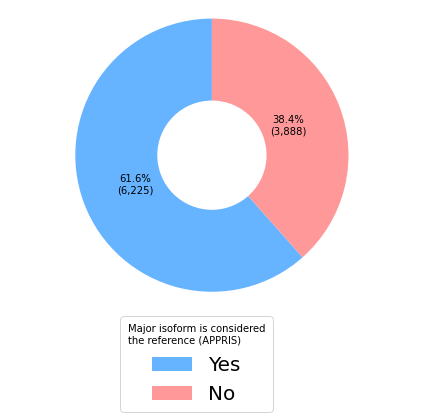

<Figure size 432x288 with 0 Axes>

In [6]:
appris_info_file = '0_pre_analysis/appris_transcripts.tsv'
appris_isonames = pd.read_table(appris_info_file)['isoname'].to_list()

sqanti_info_file = f"{config.PIPELINE_RESULTS_DIRECTORY}/transcriptome_summary/sqanti_isoform_info.tsv"
sqanti_info = pd.read_table(sqanti_info_file)

def get_is_appris(row, appris_isonames):
    return row['cat'] =='FSM' and row['isoname'] in appris_isonames
sqanti_info['isoname'] = sqanti_info['transcript'].str.replace('_', '-')
  
sqanti_info['is_appris'] = sqanti_info.apply(lambda row: get_is_appris(row, appris_isonames), axis=1)
sqanti_info = sqanti_info.groupby('gene').filter(lambda x: len(x) > 1)

major_isoform = appris_helper.get_major_isoform(sqanti_info)


appris_helper.plot_appris_donut(major_isoform, 'FigS1.4')
